## Problem One: Data acquisition

In [1]:
from sklearn.datasets import load_iris

# load dataset as a pandas dataframe
X, y = load_iris(return_X_y=True, as_frame=True)

In [2]:
# rename the columns of X for easy access

X.columns = ["_".join(col.split(" ")[:2]) for col in X.columns]
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Problem Two: Combining data

In [4]:
import pandas as pd

df = pd.concat([X,pd.DataFrame({"Species": y})], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Problem Three: Checking the data

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
Species         False
dtype: bool

In [9]:
labels = df.Species.unique()
for label in labels:    
    total_samples = (df["Species"] == label).sum()
    print(f"The total number of samples for label {label}: {total_samples}")

The total number of samples for label 0: 50
The total number of samples for label 1: 50
The total number of samples for label 2: 50


## Problem Four: Examining the iris dataset itself

* Ronald Fisher, a British biologist and statistician, utilised the multivariate Iris flower data set, sometimes known as Fisher's Iris data set, as an example of linear discriminant analysis in his 1936 paper, "The use of numerous measurements in taxonomic issues".

* Because Edgar Anderson gathered the information to measure the morphologic variance of iris blossoms from three related species, it is sometimes referred to as Anderson's Iris data set.

* In the Gaspé Peninsula, two of the three species were gathered "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

* There are fifty samples in the data set, one from each of the three species of Iris (Iris setosa, Iris virginica, and Iris versicolor. 
* Four measurements were taken from every sample: the petals' and sepals' lengths and widths, expressed in centimetres. 

* To differentiate the species from one another, Fisher created a linear discriminant model based on the combination of these four characteristics. The Annals of Eugenics (now the Annals of Human Genetics) published Fisher's study.


## Problem Five: Extracting the required data

### The difference between .loc and .iloc

.loc helps us to access slices of data by boolean arrays or labels while .iloc is used to access data slices by method of integer-only indexing.

In [10]:
# Extracting the sepal_width column using .loc
df.loc[:, "sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [11]:
# Extracting the sepal_width column using .iloc
df.iloc[:, 1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [12]:
# Extracting the 50th to 90th data from the dataframe

df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [13]:
# Extracting the 50th to 99th data of the petal_length column from the dataframe

df.iloc[50:100, 2:3]

,petal_length
50,4.7
51,4.5
52,4.9
53,4.0
54,4.6
55,4.5
56,4.7
57,3.3
58,4.6
59,3.9


In [14]:
# Extracting data with a petal_width value of 0.2

df.loc[df["petal_width"] == 0.2]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## Problem Six: Creating a diagram

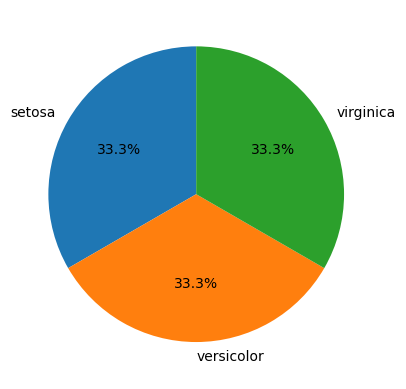

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

label_mappings = {"setosa": 0, "versicolor": 1, "virginica": 2}

# make a pie chart showing the percentage of the number of samples per label
plt.pie(df.Species.value_counts(), labels=label_mappings, autopct="%1.1f%%", startangle=90)
plt.show()

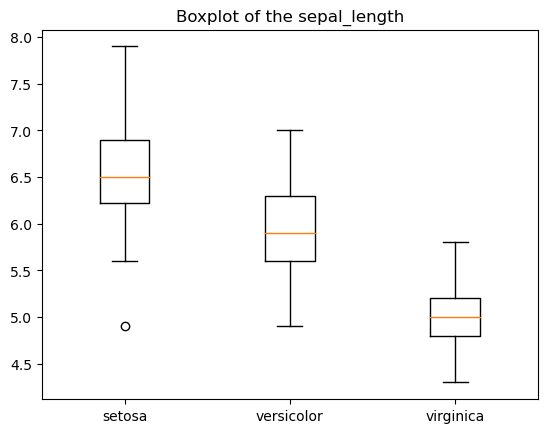

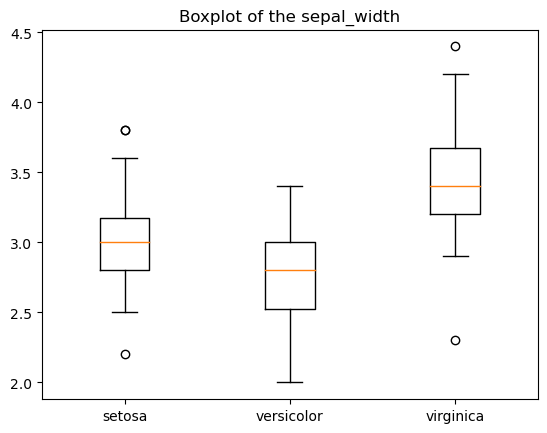

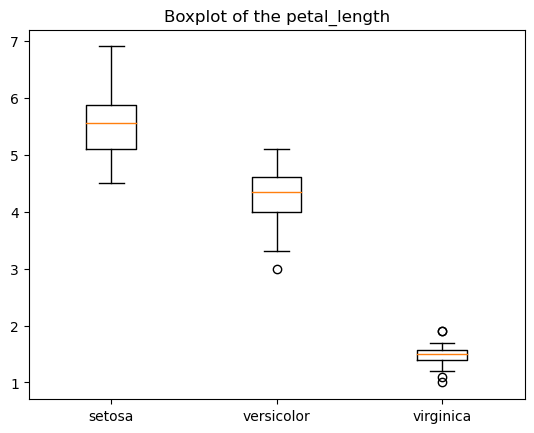

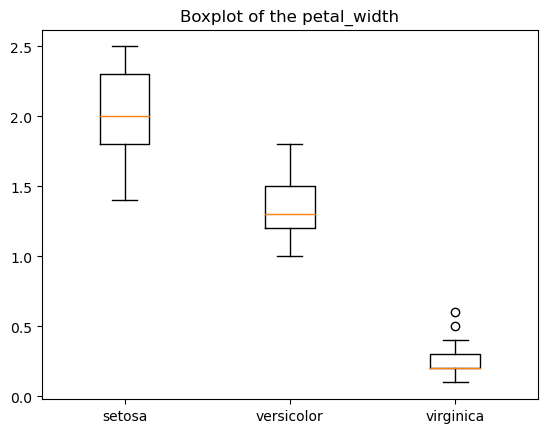

In [16]:
%matplotlib inline

# Select features one by one and visualize the distribution of data for each label using a box plot

for feature in df.columns[:-1]:
    setosa_data = df[df.Species == 0][feature]
    versicolor_data = df[df.Species == 1][feature]
    virginica_data = df[df.Species == 2][feature]

    plt.boxplot([virginica_data, versicolor_data, setosa_data])
    plt.title(f"Boxplot of the {feature}")
    plt.xticks([1,2,3], label_mappings)
    plt.show()

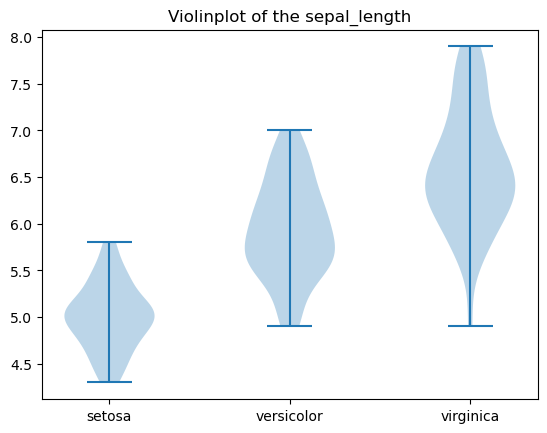

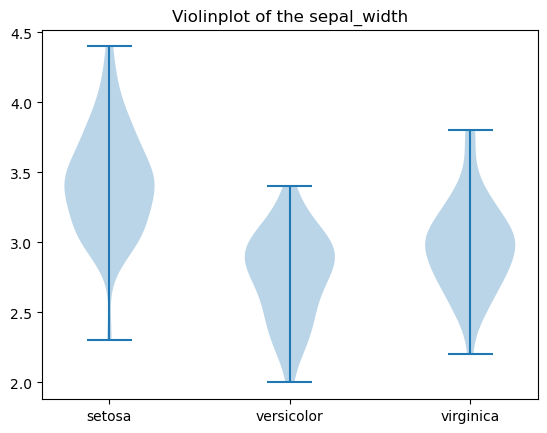

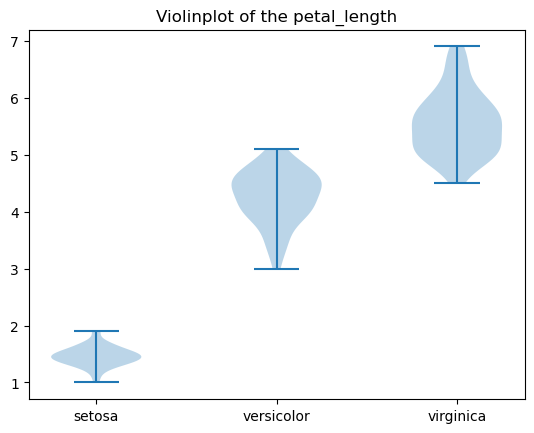

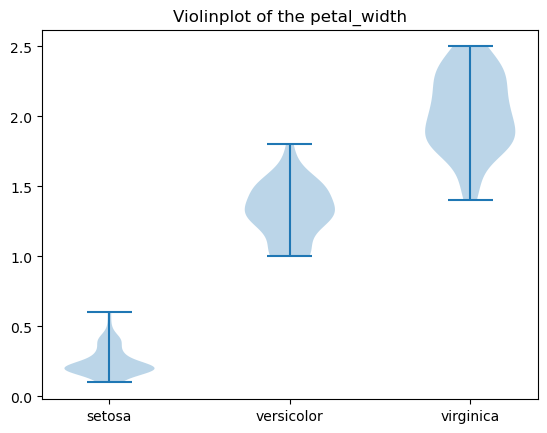

In [17]:

# Select features one by one and visualize the distribution of data for each label using a violin plot
%matplotlib inline

for feature in df.columns[:-1]:
    setosa_data = df[df.Species == 0][feature]
    versicolor_data = df[df.Species == 1][feature]
    virginica_data = df[df.Species == 2][feature]

    plt.violinplot([setosa_data, versicolor_data, virginica_data])
    plt.title(f"Violinplot of the {feature}")
    plt.xticks([1,2,3], label_mappings)
    plt.show()

#### Boxplot
The boxplot helps us to visualise the quartiles and the mean of a distribution.

##### Advantages

* Simple and straightforward, Useful for a quick summary of central tendency and spread.
* Effective for comparing medians and spreads across different groups.


#### Violinplot
While the violinplot is similar to a box plot but provides additional information by including a rotated kernel density plot on each side. The width of the plot at any given point represents the density or probability of data points being at that value. Wider sections indicate a higher probability.

##### Advantages
* Useful when detailed information about the distribution shape and density is important.
* Particularly beneficial when dealing with complex distributions or comparing multiple groups.



## Problem Seven: Confirming the relationship between features

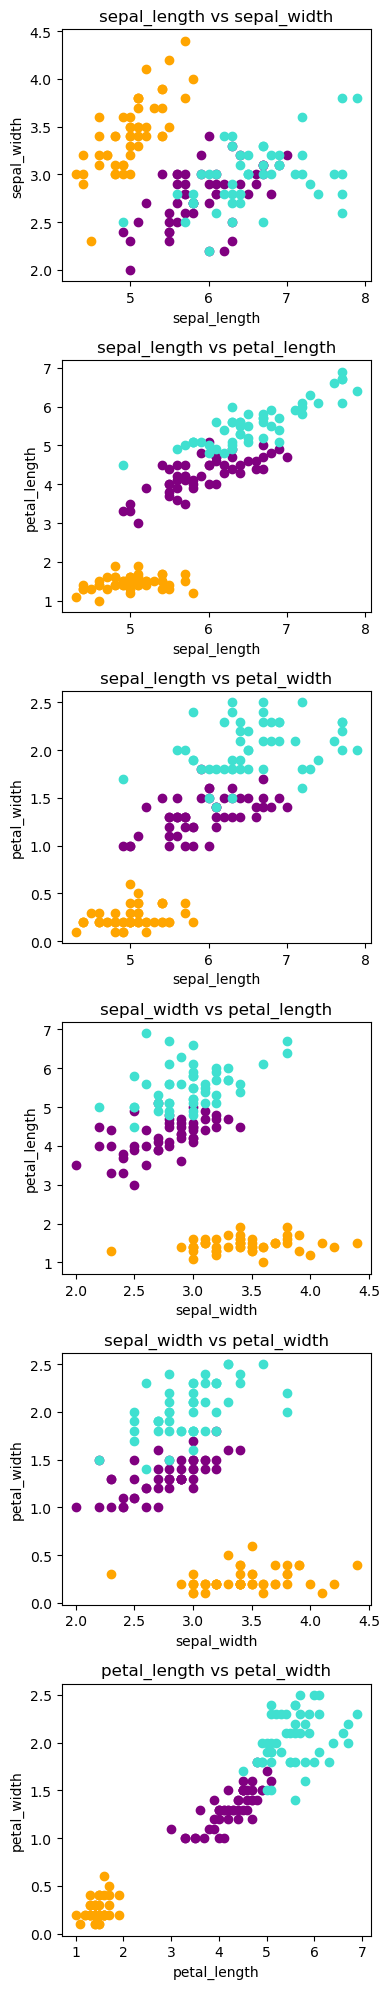

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations


# Get column names
columns = df.columns

# Create a figure with subplots
fig, axes = plt.subplots(6, figsize=(4, 20))

# Iterate over combinations of columns
for i, (col1, col2) in enumerate(combinations(columns[:4], 2)):
    axes[i].set_title(col1 + " vs " + col2)
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel(col2)
    axes[i].scatter(df[df["Species"] == 0][col1], df[df["Species"] == 0][col2], c="orange")
    axes[i].scatter(df[df["Species"] == 1][col1], df[df["Species"] == 1][col2], c="purple")
    axes[i].scatter(df[df["Species"] == 2][col1], df[df["Species"] == 2][col2], c="turquoise")



plt.tight_layout()
plt.show()


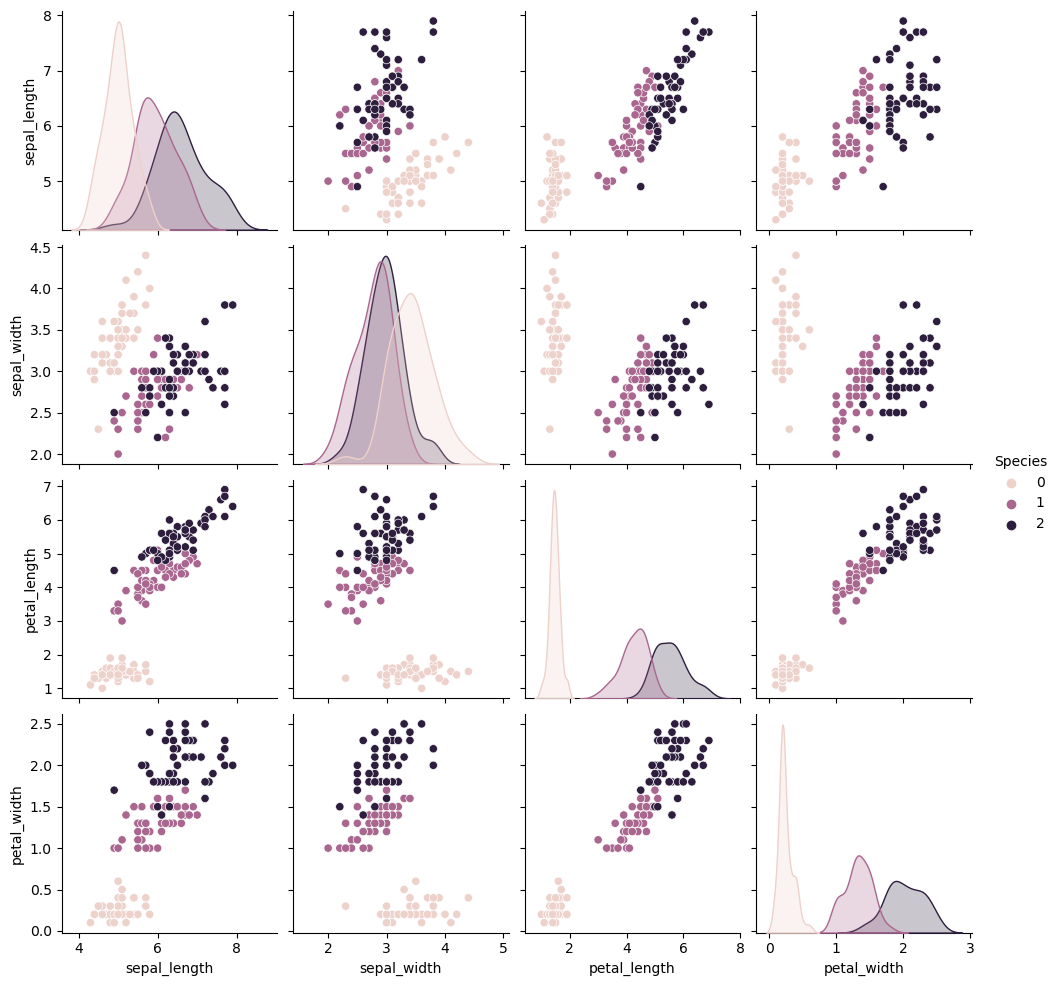

In [19]:
import seaborn as sns

sns.pairplot(df, hue="Species")
plt.show()

In [20]:
df.iloc[:, :4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


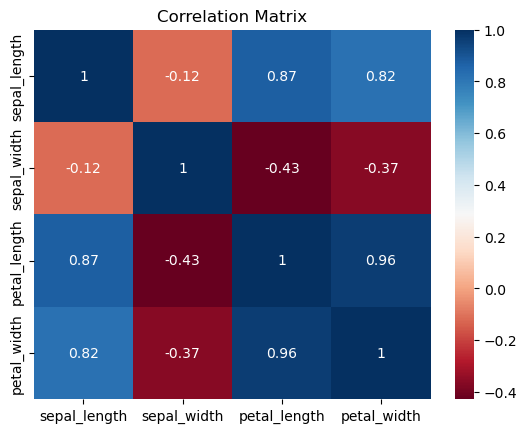

In [21]:
plt.title("Correlation Matrix")
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap=plt.cm.RdBu)
plt.show()

## Problem Eight: Explaining the results of visualized graphs and tables

I noticed from the data visualisations in the scatter plot matrix that Setosa, colour-coded with orange, has the largest sepal width but relatively has the smallest of the other features amongst the three types of irises. While Virginica, colour-coded with turquoise, has the largest or longest of the given features except the sepal width, the only feature which Setosa has the most distribution of samples with the largest numbers. The spread of Versicolor is quite average in comparison to the other iris types, the majority of its samples' features fall just in the middle of the other two.

Looking at the correlation matrix, there's a weak negative correlation between the sepal width and every other feature, with there being very high correlation between the other features. The strong positive correlation between the other features indicates the prospects of a high predictive power if the dataset is to be used to train a machine learning model, while the poor correlation values between the sepal width and the others suggests the prospects that the sepal width would have very low predictive power.